# Introduction to neural networks using Keras I

#### By Julian Rincon, _Department of Applied Mathematics and Computer Science, Universidad del Rosario_
#### Notebook originally written by Pavlos Protopapas, _Harvard Institute for Applied Computational Science_
###### Based on the book [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python) by François Chollet.

In this (first) tutorial we will cover/review the following topics:

1. A quick and dirty installation and introduction to [Keras](http://keras.io).
2. Basic concepts in neural networks seen in the lectures.
3. A prototypical application of neural networks using Keras.

Let us start by reviewing some basic components of machine and deep learning.

---

## Theory about Neural Networks

### From Linear to Deep Learning Models

#### Beyond Linear Models

Linear models can be fit efficiently via convex optimization, but the model capacity is limited.

Alternative:
$$ f(x) = w^T\phi(x) $$
where $\phi$ is a *non-linear transform*

A machine-learning model transforms its input data into meaningful outputs, a process that is "learned" from exposure to known examples of inputs and outputs. Therefore, _**the central problem in machine learning and deep learning is to meaningfully transform data**_: in other words, to learn useful *representations* of the input data at hand -- representations that get us closer to the expected output.

#### Traditional Machine Learning

One option is to use a very generic $\phi$. If $\phi(x)$ is of high enough dimension, we can always have enough capacity to fit the training set, but generalization to the test set often remains poor. Very generic feature mappings are usually based only on the principle of local smoothness and do not encode enough prior information to solve advanced problems.

Another option is to manually engineer $\phi$. Until the advent of deep learning, this was the dominant approach. It requires decades of human effort for each separate task, with practitioners specializing in different domains, such as speech recognition or computer vision, and with little transfer between domains.

#### Deep Learning

Directly learn $\phi$ with parameters $\theta$, specifically:
$$f(x;\theta) = w^T\phi(x;\theta)$$


We now have parameters $\theta$ that we use to learn $\phi$ from a broad class of functions, and parameters that map from $\phi(x)$ to the desired output. This is an example of a deep feed-forward network, with $\phi$ defining a hidden layer. This approach is the only one of the three that gives up on the convexity of the training problem, but the benefits outweigh the harms. In this approach, we parametrize the representation as $\phi(x;\theta)$ and use the optimization algorithm to find the $\theta$ that corresponds to a good representation. If we wish, this approach can capture the benefit of the first approach by being highly generic$-$we do so by using a very broad family $\phi(x;\theta)$. Deep learning can also capture the benefit of the second approach. Human practitioners can encode their knowledge to help generalization by designing families $\phi(x;\theta)$ that they expect will perform well. The advantage is that the human designer only needs to find the right general function family rather than finding precisely the right function.

![layers of representations](representations.png)

The *deep* in *deep learning* isn't a reference to any kind of deeper understanding achieved by the approach; rather, it stands for this idea of successive layers of representations. How many layers contribute to a model of the data is called the *depth* of the model. Other appropriate names for the field could have been *layered representations learning* and *hierarchical representations learning*. Modern deep learning often involves tens or even hundreds of successive layers of representations$-$and they're all learned automatically from exposure to training data.

### Components of Deep Learning

To do machine learning, and in particular deep learning, we need three things:

* **Input** data points$-$For instance, if the task is speech recognition, these data points could be sound files of people speaking. If the task is image tagging, they could be pictures.
* Examples of the expected **output**$-$In a speech-recognition task, these could be human-generated transcripts of sound files. In an image task, expected outputs could be tags such as "dog", "cat", and so on.
* A **cost (or loss) function** which is a way to measure whether the algorithm is doing a good job. This is necessary in order to determine the distance between the algorithm's current output and its expected output. The measurement is used as a feedback signal to adjust the way the algorithm works. This adjustment step is what we call *learning*.

![components of deep learning](components.png)

---

## Instructions to set up a workstation with Keras

We will assume we've already have installed on our workstation

1. [Python](https://www.python.org/) 3,
1. Linear algebra libraries: BLAS and LAPACK,
1. Python's scientific suite: [Numpy](http://www.numpy.org/), [Scipy](https://www.scipy.org/), and [Matplotlib](https://matplotlib.org/).

In order to set up a functioning workstation, it's recommended to work with [Jupyter](http://jupyter.org/) Notebooks. The Jupyter Notebook is an open-source web application that allows to code interactively. You can either install Jupyter using Python's package manager `pip` or directly install the Anaconda Distribution. Here we follow the first route. For details on how to install Jupyter go to http://jupyter.org/install.html.

In case you don't have it, you will need to install `pip`. However, make sure you've updated your OS's package database. If using OSX's `port`, you must update `port`'s tree and upgrade any installed ports. (Of course, use the corresponding package manager according to your OS.) In a terminal type

    sudo port selfupdate
    sudo port upgrade outdated #this might take a while
    sudo port install py34-pip
    sudo port select --set pip pip34

The `py34` above stands for Python3.4, again, change that accordingly in your workstation. The actual installation of [Jupyter](http://jupyter.org/) will follow from the commands:

    sudo -H python3 -m pip install --upgrade pip  
    sudo -H python3 -m pip install jupyter

Consider setting up and exporting the environment variable `PATH`, if necessary.

The framework [Keras](http://keras.io) is a front-end to deep learning engines such as [TensorFlow](https://www.tensorflow.org/), [Theano](https://github.com/Theano/), and Microsoft's Cognitive Toolkit [CNTK](https://www.microsoft.com/en-us/cognitive-toolkit/). It's highly recommended to use TensorFlow, so that's the back-end we will install.

Next we install TensorFlow, for further details visit https://www.tensorflow.org/install/. Input in your terminal

    sudo -H pip install tensorflow

and follow any prompted instructions.

Finally, for the last step we get to install the Keras framework:

    sudo -H pip install keras

More information is provided in Kera's website https://keras.io/. In order to check the successful installation of both TensorFlow and Keras open an interactive Python 3 session and type 

    import keras
    keras.__version__

you should see an output that includes the message 

> Using TensorFlow backend.  
> '2.2.0'

or something like that. If you get a message of that form then we've swimmingly installed Keras and its dependencies.

Optionally, you may want to install other useful libraries. [HDF5](https://matplotlib.org/) and [h5py](https://www.h5py.org/) for quick and efficient manipulation of large files. [Graphviz](https://www.graphviz.org/) for explicit visualization of Keras models. For GPU support you will need to install CUDA, cuDNN, and install TensorFlow with GPU support. For details check out NVIDIA's web page https://developer.nvidia.com/.

Let's now move on to some neural networks applications.

---

## Deep learning examples using Keras

This notebook contains the code samples found in Chapter 2, Section 1 and 5 of [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff) by F. Chollet. Note that the original text features far more content, in particular further explanations and figures: in this notebook, you will only find source code and related comments.

### Hand-written digit image classification

We will now take a look at a first concrete example of a neural network, which makes use of the Python library Keras to learn to classify hand-written digits. Unless you already have experience with Keras or similar libraries, you will not understand everything about this first example right away. You probably haven't even installed Keras yet. Don't worry, that is perfectly fine. In the next lecture or lab, we will review each element in our example and explain them in detail. So don't worry if some steps seem arbitrary or look like magic to you! We've got to start somewhere.

The problem we are trying to solve here is to classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 categories (0 to 9). The dataset we will use is the `MNIST` dataset, a classic dataset in the machine learning community, which has been around for almost as long as the field itself and has been very intensively studied. It's a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (NIST) in the 1980s. *You can think of "solving" MNIST as the "Hello World" of deep learning* -- it's what you do to verify that your algorithms are working as expected. As you become a machine learning practitioner, you will see MNIST come up over and over again, in scientific papers, blog posts, and so on.

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:

In [1]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


`train_images` and `train_labels` form the "training set", the data that the model will learn from. The model will then be tested on the "test set", `test_images` and `test_labels`. Our images are encoded as Numpy arrays, and the labels are simply an array of digits, ranging from 0 to 9. There is a one-to-one correspondence between the images and the labels.

Let's have a look at the training data:

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
print(train_labels.shape, train_images[0])

(60000,) 5


Let's have a look at the test data:

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(test_labels)

10000

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Let's randomly plot actual images to see and verify their content. We first need to import the `matplotlib` library for visualization, then we can plot the images.

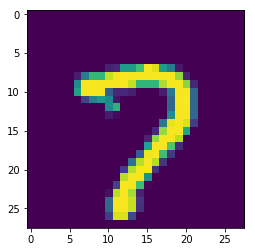

The label for this image is 7


In [12]:
import numpy as np
import matplotlib.pyplot as plt

img = np.random.randint(0, len(train_images))
digit = train_images[img]
plt.imshow(digit)
plt.show()
print('The label for this image is', train_labels[img])

What does the following instruction do?

In [13]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Our workflow will be as follow: first we will present our neural network with the training data, `train_images` and `train_labels`. The network will then learn to associate images and labels. Finally, we will ask the network to produce predictions for `test_images`, and we will verify if these predictions match the labels from `test_labels`.

Let's build our network $-$ again, remember that you aren't supposed to understand everything about this example just yet.

In [14]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='sigmoid', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='sigmoid'))

The core building block of neural networks is the **layer**, a data-processing module which you can conceive as a "filter" for data. Some data comes in, and comes out in a more useful form. Precisely, layers extract _representations_ out of the data fed into them $-$ hopefully representations that are more meaningful for the problem at hand. Most of deep learning really consists of chaining together simple layers which will implement a form of progressive "data distillation". A deep learning model is like a sieve for data processing, made of a 
succession of increasingly refined data filters $-$ the "layers".

Here our network consists of a sequence of two `Dense` layers, which are densely-connected  or **fully-connected** neural layers. The second (and last) layer is a 10-way "softmax" layer, which means it will return an array of 10 probability scores (summing to 1). Each score will be the probability that the current digit image belongs to one of our 10 digit classes.

To make our network ready for training, we need to pick three more things, as part of the "compilation" step:

* A _loss function_: this is how the network will be able to measure how good a job it's doing on its training data, and thus how it will be able to steer itself in the right direction.
* An _optimizer_: this is the mechanism through which the network will update itself based on the data it sees and its loss function.
* Some _metrics_ to monitor during training and testing. Here we will only care about accuracy (the fraction of the images that were correctly classified).

The exact purpose of the loss function and the optimizer will be made clear throughout the next two chapters.

In [16]:
network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Before training, we will preprocess our data by reshaping it into the shape that the network expects, and scaling it so that all values are in the `[0, 1]` interval. Previously, our training images for instance were stored in an array of shape `(60000, 28, 28)` of type `uint8` with values in the `[0, 255]` interval. We transform it into a `float32` array of shape `(60000, 28 * 28)` with values between 0 and 1.

In [17]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

We also need to categorically encode the labels, a step which we explain in chapter 3:

In [18]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [20]:
print(train_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


We are now ready to **train** our network, which in Keras is done via a call to the `fit` method of the network: 
we "fit" the model to its training data.

In [21]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 4s 69us/step - loss: 2.1321 - acc: 0.4757
Epoch 2/5
60000/60000 [==============================] - 4s 68us/step - loss: 1.5927 - acc: 0.7530
Epoch 3/5
60000/60000 [==============================] - 4s 66us/step - loss: 1.1621 - acc: 0.8028
Epoch 4/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.9110 - acc: 0.8264
Epoch 5/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.7644 - acc: 0.8407


Two quantities are being displayed during training: the "loss" of the network over the training data, and the "accuracy" of the network over the training data.

We quickly reach an accuracy of 0.989 (i.e. 98.9%) on the training data. Now let's check that our model performs well on the test set too:

In [22]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 59us/step


In [23]:
print('test_acc:', test_acc, '\ntest_loss:', test_loss)

test_acc: 0.8537 
test_loss: 0.6914102837562561


Just for comparison, let's explicitly evaluate the model performance information on the training data:

In [24]:
train_loss, train_acc = network.evaluate(train_images, train_labels)

60000/60000 [==============================] - 3s 50us/step


In [25]:
print('train_acc:', train_acc, '\ntrain_loss:', train_loss)

train_acc: 0.8470833333333333 
train_loss: 0.7113502746899922


Our **test set accuracy** turns out to be 97.8% $-$ that's quite a bit lower than the **training set accuracy** 99.2%. 
This gap between training accuracy and test accuracy is an example of "overfitting", the fact that machine learning models tend to perform worse on new data than on their training data. Overfitting will be a central topic in chapter 3.

This concludes our very first example $-$ you just saw how we could build and a train a neural network to classify handwritten digits, in less than 20 lines of Python code.

In the next lecture/lab, we will go in detail over every moving piece we just previewed, and clarify what is really 
going on behind the scenes.

### Performance plots as a function of hyper-parameters

Do the exercises propose at the end of this notebook in this section.

In [40]:
import numpy as np
import matplotlib.pyplot as plt

from keras import models
from keras import layers
#from keras import optimizers
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [41]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [62]:
hp_list, train_acc_list, test_acc_list = [], [], []

for q in range(5, 13, 2):
    hp =  2 ** q
    print('*'*40, 'hyper-parameter', hp, '*'*40)
    
    network = models.Sequential()
    network.add(layers.Dense(512, activation='sigmoid', input_shape=(28 * 28,)))
    network.add(layers.Dense(10, activation='sigmoid'))

    #sgd = optimizers.SGD(lr=.001, momentum=0.9, nesterov=True, decay=1e-6)
    network.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    network.fit(train_images, train_labels, epochs=5, batch_size=hp)

    test_loss, test_acc = network.evaluate(test_images, test_labels)
    train_loss, train_acc = network.evaluate(train_images, train_labels)
    
    hp_list.append(hp)
    test_acc_list.append(test_acc)
    train_acc_list.append(train_acc)

**************************************** hyper-parameter 128 ****************************************
Epoch 1/5
60000/60000 [==============================] - 7s 111us/step - loss: 0.4714 - acc: 0.8540
Epoch 2/5
60000/60000 [==============================] - 6s 92us/step - loss: 0.2742 - acc: 0.9206
Epoch 3/5
60000/60000 [==============================] - 5s 91us/step - loss: 0.2160 - acc: 0.9375
Epoch 4/5
60000/60000 [==============================] - 5s 91us/step - loss: 0.1730 - acc: 0.9503
Epoch 5/5
60000/60000 [==============================] - 6s 100us/step
**************************************** hyper-parameter 512 ****************************************
Epoch 1/5
60000/60000 [==============================] - 5s 89us/step - loss: 0.7888 - acc: 0.7748
Epoch 2/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.3412 - acc: 0.9008
Epoch 3/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.3088 - acc: 0.9103
Epoch 4/5
60000/60000 [========

In [26]:
#rmsprop
print('train_acc_list', train_acc_list)
print('test_acc_list', test_acc_list)

train_acc_list [0.9817166666666667, 0.97145, 0.94045, 0.9160166666666667]
test_acc_list [0.974, 0.9656, 0.9371, 0.9177]


In [64]:
#sgd
print('train_acc_list', train_acc_list)
print('test_acc_list', test_acc_list)

train_acc_list [0.9658166666666667, 0.9227, 0.9016333333333333]
test_acc_list [0.9611, 0.9234, 0.9074]


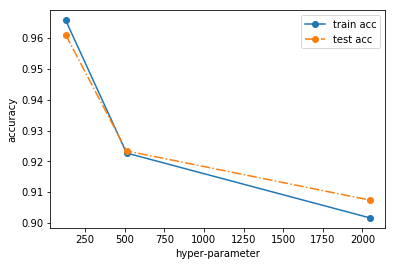

In [65]:
plt.plot(hp_list, train_acc_list, '-o', label='train acc')
plt.plot(hp_list, test_acc_list, '-.o', label='test acc')
plt.xlabel('hyper-parameter')
plt.ylabel('accuracy')
plt.legend()
plt.show()

### Checking image prediction

So far we've dealing with pretty technical stuff: how to build neural network models, train them, test them, etc. Let's now check whether a given image is correctly classified within their corresponding class. How do we do that? Well...

1. Choose and load a random image in the appropriate format from the appropriate dataset.
1. Use the `predict_classes` method from Keras. (Find its documentation.)
1. Extract the prediction from whatever structure the above method returns.
1. Display the selected image and print the corresponding class prediction.

Try to implement this during the lab. Discuss what kind of models you encountered.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
img = np.random.randint(0, len(test_images))
check_image = test_images[img].reshape((1,784))

In [ ]:
check_class = network.predict_classes(check_image)
print(type(check_class))

prediction = check_class[0]

In [ ]:
digit = test_images[img]
plt.imshow(digit)
plt.show()
print('The label for this image is', test_labels[img])

### Exercises

Now that you are a little bit more acquainted with the framework Keras, it's time to play around with some of the hyper-parameters that we can modify when constructing and training a neural network. The idea is to keep using the hand-written digit recognition example.

In this exercise, you will plot and analyze how the neural network model performs, i.e. inspect accuracy and loss, when you modify the following parameters keeping all the other model parameters fixed:

* Number of epochs, fixed batch size,
* Batch size, fixed number of epochs,
* Number of neurons per layer, fixed number of layers,
* Number of layers, fixed number of neurons per layer.

Time permitting, it is also enlightening to analyze loss and accuracy when the activation parameter is modified. For instance, try changing `relu`s for `sigmoid`s and check out the performance of the neural network. What happen if the output layer's activation function is not `sigmoid` but a `softmax`?

---

## Further reading

Most of this introduction is based on the book [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python) by François Chollet, the creator of Keras. It is a very practical introduction to Deep Learning without requiring all the mathematical background.

The [Deep Learning](http://www.deeplearningbook.org/) book is a theoretical book in three parts: 1) The mathematical basis for Deep Learning, 2) Modern Practice Deep Networks, 3) Deep Learning Research. It is a good second book after getting some practical initial experience.

For more advance deep learning practitioners, check out the book from the [link](https://machinelearningmastery.com/deep-learning-with-python/).

We also recommend Andrew Ng's online course: https://www.deeplearning.ai/